<a href="https://colab.research.google.com/github/mbasant330/datascience/blob/main/tsf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [3]:
%cd drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [24]:
from pandas import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

Store the train and testing

In [25]:
train=pandas.read_csv("Train.csv")
test=pandas.read_csv("Test.csv")

Copy the train and test files

In [26]:
train_og=train.copy()
test_og=test.copy()


 
**Dataset Structure and content**

*Lets have a look the train and test dataset*

In [27]:
train.columns,test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [28]:
train.dtypes,test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [29]:
train.shape, test.shape


((18288, 3), (5112, 2))

Extract the features of the time and date from Datetime Module

In [30]:
train['Datetime']=pandas.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
test['Datetime']=pandas.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train_og['Datetime']=pandas.to_datetime(train_og.Datetime, format='%d-%m-%Y %H:%M')
test_og['Datetime']=pandas.to_datetime(train_og.Datetime, format='%d-%m-%Y %H:%M')

In [31]:
for i in (train,test,test_og,train_og):
  i['year']=i.Datetime.dt.year
  i['month']=i.Datetime.dt.month
  i['day']=i.Datetime.dt.day
  i['Hour']=i.Datetime.dt.hour


In [32]:
train['day of week']=train['Datetime'].dt.dayofweek
temp=train['Datetime']

In [33]:
def weekname(row):
  if row.dayofweek==5 or row.dayofweek==6:
    return 1
  else:
    return 0

temp2=train['Datetime'].apply(weekname)
train['weekend']=temp2
print(train['weekend'])


0        1
1        1
2        1
3        1
4        1
        ..
18283    0
18284    0
18285    0
18286    0
18287    0
Name: weekend, Length: 18288, dtype: int64


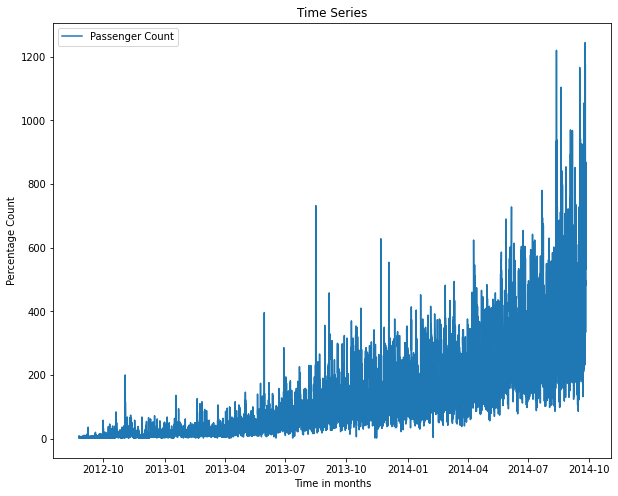

In [34]:
train.index=train['Datetime']
df=train.drop('ID',1)
ts =df['Count']
plt.figure(figsize=(10,8))
plt.plot(ts,label='Passenger Count')
plt.title('Time Series')
plt.xlabel("Time in months")
plt.ylabel("Percentage Count")
plt.legend()


Exploratory Analysis

Working with Hypothesis Testing

<AxesSubplot:xlabel='year'>

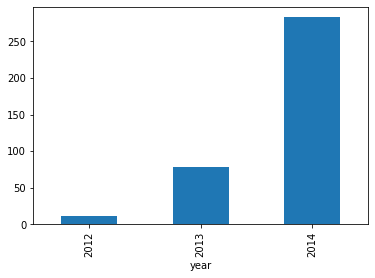

In [35]:
train.groupby('year')['Count'].mean().plot.bar()


<AxesSubplot:xlabel='month'>

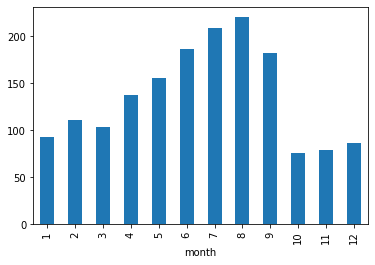

In [36]:
train.groupby('month')['Count'].mean().plot.bar()

<AxesSubplot:title={'center':'Passenger Count monthwise'}, xlabel='year,month'>

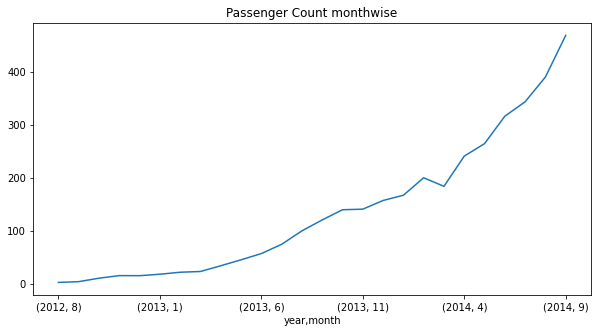

In [38]:
temp=train.groupby(['year','month'])['Count'].mean()
temp.plot(figsize=(10,5),title='Passenger Count monthwise')

<AxesSubplot:xlabel='day'>

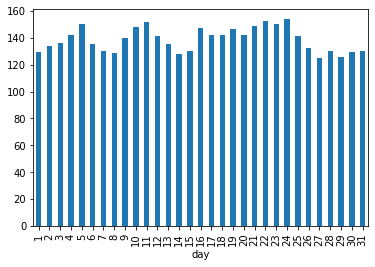

In [39]:
train.groupby('day')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='Hour'>

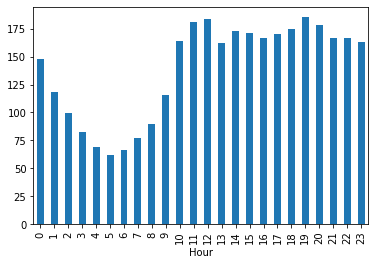

In [40]:
train.groupby('Hour')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='weekend'>

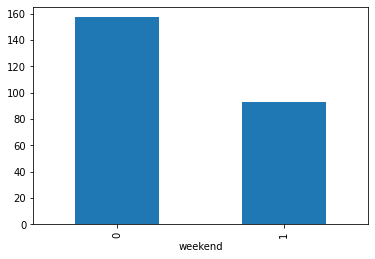

In [41]:
train.groupby('weekend')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='day of week'>

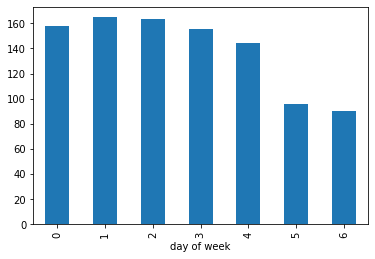

In [42]:
train.groupby('day of week')['Count'].mean().plot.bar()

In [43]:
train=train.drop('ID',1)

In [44]:
train.Timestamp=pandas.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index=train.Timestamp
hourly=train.resample('H').mean()
daily=train.resample('D').mean()
weekly=train.resample('W').mean()
monthly=train.resample('M').mean()

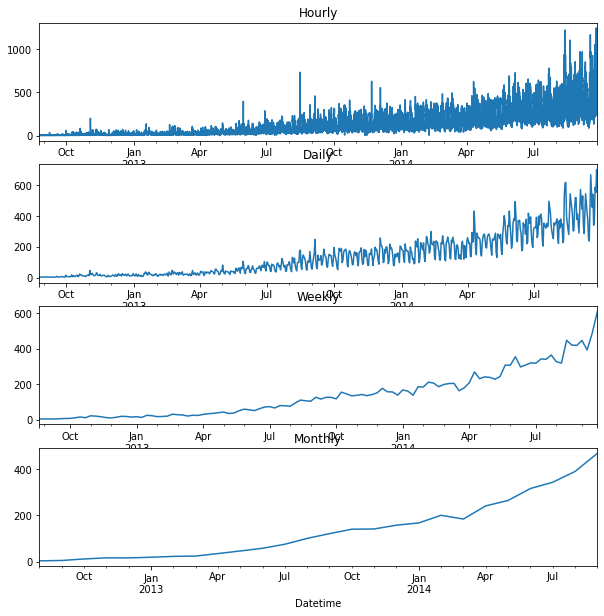

In [51]:
fig,axs=plt.subplots(4,1)
hourly.Count.plot(title='Hourly',ax=axs[0],figsize=(10,10))
daily.Count.plot(title='Daily',ax=axs[1],figsize=(10,10))
weekly.Count.plot(title='Weekly',ax=axs[2],figsize=(10,10))
monthly.Count.plot(title='Monthly',ax=axs[3],figsize=(10,10))
plt.show()


In [52]:
test.Timestamp=pandas.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
test.index=test.Timestamp
test=test.resample('D').mean()
train.Timestamp=pandas.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index=train.Timestamp
train=train.resample('D').mean()

In [55]:
Train=train.loc['2012-08-25':'2014-06-24'] 
valid=train.loc['2014-06-25':'2014-09-25']

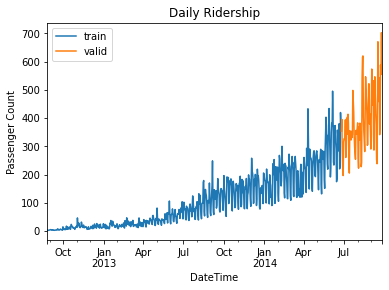

In [56]:
Train.Count.plot(title='Daily Ridership', label='train')
valid.Count.plot(title='Daily Ridership' , label='valid')
plt.xlabel('DateTime')
plt.ylabel("Passenger Count")
plt.legend(loc='best')
plt.show()

Naive Approach

A naive approach consists of calculating a histogram of angles, assuming the accumulation of points corresponding to the directions of interest will result in visible peaks.

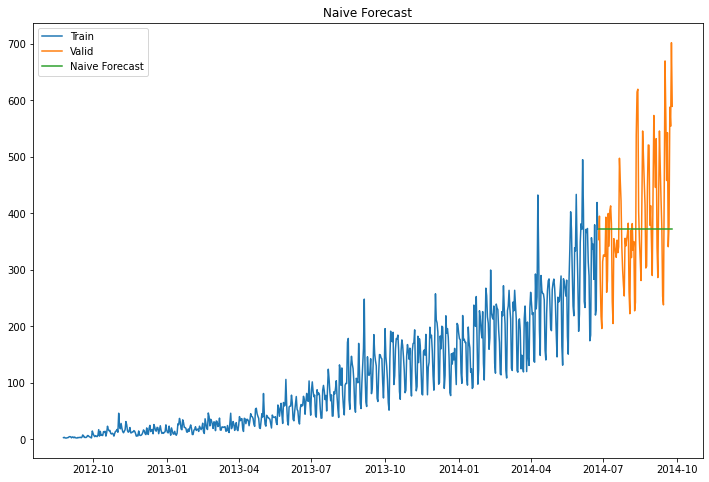

In [59]:
dd=np.asarray(Train.Count)
y_hat=valid.copy()
y_hat['naive']=dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(Train.index,Train['Count'],label='Train')
plt.plot(valid.index,valid['Count'],label='Valid')
plt.plot(y_hat.index,y_hat['naive'],label='Naive Forecast')
plt.legend()
plt.title("Naive Forecast")
plt.show()

In [60]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive)) 
print(rms)

111.79050467496724


Moving Average

Here the predictions are made on the basis of the average of the last few points instead of taking all the previously known values.

Let’s try the rolling mean for the last 10, 20, and 50 days and visualize the results.

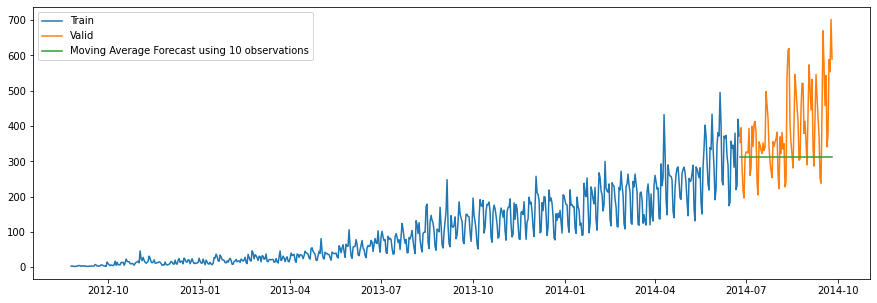

In [61]:
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1] 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'],label='Moving Average Forecast using 10 observations')
plt.legend(loc='best') 
plt.show()

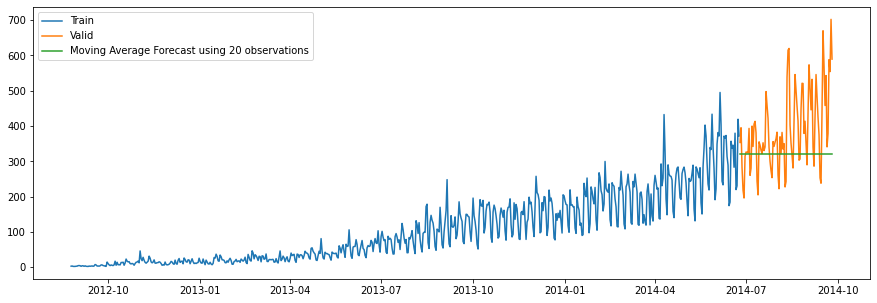

In [62]:
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1] 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], 
                label='Moving Average Forecast using 20 observations') 
plt.legend(loc='best') 
plt.show()


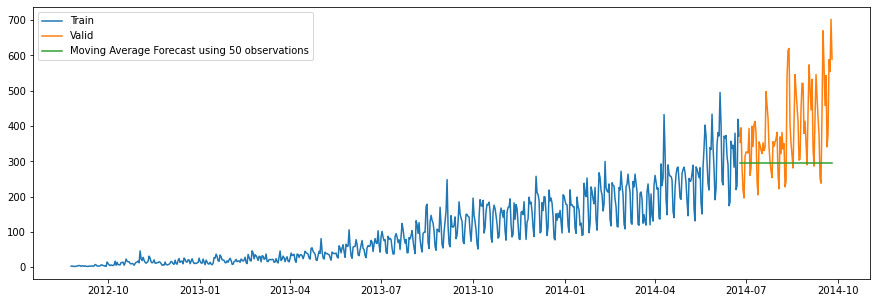

In [63]:
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1] 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], 
                    label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()

In [64]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast)) 
print(rms)


144.19175679986793


Holt’s Linear Trend Model

It is an extension of simple exponential smoothing to allow forecasting of data with a trend.
This method takes into account the trend of the dataset. The forecast function in this method is a function of level and trend.

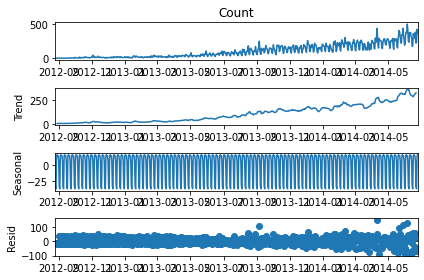

In [69]:
import statsmodels.api as sm 
sm.tsa.seasonal_decompose(Train.Count).plot() 
result = sm.tsa.stattools.adfuller(train.Count) 
plt.show()